# Пример создателей roc_utils
Запускаем пример создателей roc_utils, проверяем, что значения и картинка не изменились после изменений в библиотеке

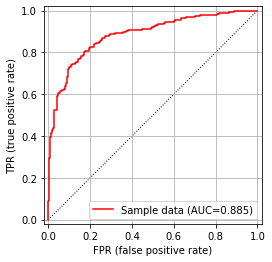

show_ti = True
show_ci = True
show_all = True


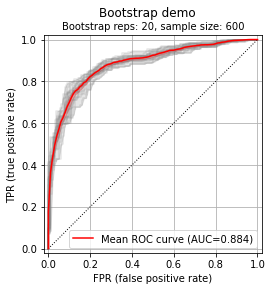

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import roc_utils as ru

# Construct a binary classification problem
x, y = ru.demo_sample_data(n1=300, mu1=0.0, std1=0.5,
                           n2=300, mu2=1.0, std2=0.7)

# Compute the ROC curve...
pos_label = True
roc = ru.compute_roc(X=x, y=y, pos_label=pos_label)

# ...and visualize it
ru.plot_roc(roc, label="Sample data", color="red")
plt.show()

# To perform a ROC analysis using bootstrapping
n_samples = 20
ru.plot_roc_bootstrap(X=x, y=y, pos_label=pos_label,
                      n_bootstrap=n_samples,
                      title="Bootstrap demo");
plt.show()


# pos_label = True
# roc = compute_roc(X=x, y=y, pos_label=pos_label)

# # ...and visualize it
# plot_roc(roc, label="Sample data", color="red")
# plt.show()

# # To perform a ROC analysis using bootstrapping
# n_samples = 20
# plot_roc_bootstrap(X=x, y=y, pos_label=pos_label,
#                       n_bootstrap=n_samples,
#                       title="Bootstrap demo");
# plt.show()

# y_0 = 10 - y
# y_new = np.hstack((y_0, y))

Генерим те же графики для 2 классов, только используем новую функцию для мультикласса (с количеством классов 2)

In [2]:
x_0 = 10 - x
x_new = np.hstack((x_0.reshape(-1, 1), x.reshape(-1, 1)))
y = y.astype(int)

show_ti = True
show_ci = True
show_all = True


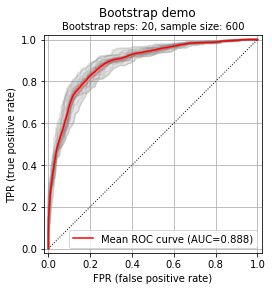

In [3]:
# To perform a ROC analysis using bootstrapping
n_samples = 20
rets = ru.plot_roc_bootstrap(x_new, y, 
                      n_bootstrap=n_samples,
                      title="Bootstrap demo",
                      multi = "Classes",
                      num_classes_or_labels = 2)
plt.show()



In [30]:
print(f"mean = {rets['auc_mean']}")
print(f"std = {rets['auc_std']}")
print(f"CI = {rets['auc95_ci']}")

mean = 0.8867778071481272
std = 0.014040808538782033
CI = [[0.88003579 0.89351982]]


# Пример для датасета с 5 классами (мультикласс), метод Macro Average

Создаем датасет с 10 фичами, 5 классами, применяем к нему классификатор и строим ROC для мультикласса

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

# from sklearn import svm, datasets
# iris = datasets.load_iris()
# X = iris.data
# y = y_true = iris.target

# data = pd.read_csv("seeds.csv", sep = ',')
# X = data[data.columns[:-1]]
# y = data['Type'] - 1
# X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.datasets import make_multilabel_classification, make_classification

X, y = make_classification(n_samples=1200, n_features=10, n_informative = 5,  n_classes=5) 
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.5, random_state=42)

(1200, 10)
(1200,)


In [32]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier ()
model.fit(X_train,y_train)
y_score = model.predict_proba(X_test)
print(y_score.shape)

(600, 5)


In [33]:
classes = list(set(y_true))
print(classes)

[0, 1, 2, 3, 4]


Строим одну усредненную рок кривую, без построения доверительных интервалов, без выборок методом бутстреп

In [34]:
num_classes = 5
roc = ru.compute_roc_multi(y_score, y_true, num_classes, multi = "Classes")

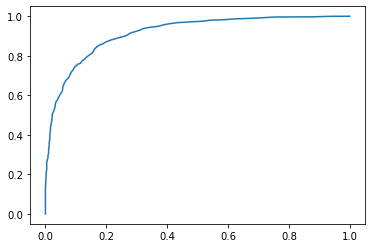

In [35]:
from matplotlib import pyplot as plot

plt.plot(roc.fpr, roc.tpr)

Строим усреденную рок кривую для выборок методом бутстреп. На вход функции массивы размерами (y_score -  (n_samples,n_classes), 
y_true (n_samples, ))

In [36]:
rets = ru.compute_roc_bootstrap(y_score, y_true, 
                            stratified = True, 
                            n_bootstrap=1000,
                            multi = "Classes",
                            num_classes_or_labels = 5)

In [37]:
print(f"mean = {rets['auc_mean']}")
print(f"std = {rets['auc_std']}")
print(f"CI = {rets['auc95_ci']}")


mean = 0.9157503425086534
std = 0.007435783374307876
CI = [[0.91528869 0.916212  ]]


In [38]:
print(y_score.shape, y_true.shape)

(600, 5) (600,)


show_ti = True
show_ci = True
show_all = False


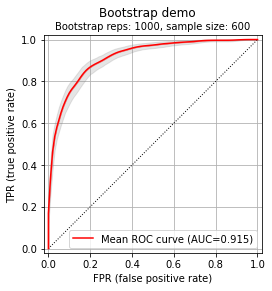

In [39]:
n_samples = 1000
rets = ru.plot_roc_bootstrap(y_score, y_true, 
                      n_bootstrap=n_samples,
                      title="Bootstrap demo",
                      multi = "Classes",
                      num_classes_or_labels = 5)

In [40]:
print(f"mean = {rets['auc_mean']}")
print(f"std = {rets['auc_std']}")
print(f"CI = {rets['auc95_ci']}")

mean = 0.9154720842391685
std = 0.007676854892288628
CI = [[0.91499546 0.91594871]]


Посчитаем метрики другим способом

In [41]:
mean, std = ru.calculate_bootstrap_auc_way2(y_score, y_true, n_bootstrap = 1000, multi = "Classes", num_classes_or_labels = 5)
print(mean)
print(std)

[0.014089026047656689, 0.018117518731370515, 0.013205916859798428, 0.008991215075735148, 0.01301051935689858] [0.8871938596659326, 0.8704392808362148, 0.9409421610040806, 0.9481518240380911, 0.9313347309545081]
0.9156123712997655
0.006168490715030308


# Пример для датасета с 2 лейблами (мультилейбел), метод Macro Average

In [42]:
from sklearn.datasets import make_multilabel_classification

X, y = make_multilabel_classification(n_samples=1200, n_features=3, n_classes=2, n_labels=2)

In [43]:
print(X.shape)
print(y.shape)

(1200, 3)
(1200, 2)


In [44]:
X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.5, random_state=42)

from sklearn import tree
from sklearn.linear_model import LogisticRegression



In [45]:
model1 = LogisticRegression()
model1.fit(X_train,y_train[:, 0])
y_score1 = model1.predict_proba(X_test)
print(y_score1.shape)

(600, 2)


In [46]:
model2 = LogisticRegression()
model2.fit(X_train,y_train[:, 1])
y_score2 = model2.predict_proba(X_test)
print(y_score2.shape)

(600, 2)


In [47]:
y_pred = np.hstack((y_score1[:, 1].reshape(-1, 1), y_score2[:, 1].reshape(-1, 1)))

In [48]:
print(y_true.shape)
print(y_pred.shape)

(600, 2)
(600, 2)


На вход функции массивы размерами (y_pred -  (n_samples,n_classes), y_true (n_samples, n_classes))

show_ti = True
show_ci = True
show_all = False


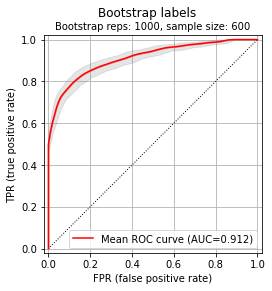

In [55]:
n_samples = 1000
rets = ru.plot_roc_bootstrap(y_pred, y_true, 
                      n_bootstrap=n_samples,
                      title="Bootstrap labels",
                      multi = "Labels",
                      num_classes_or_labels = 2)

In [56]:
print(f"mean = {rets['auc_mean']}")
print(f"std = {rets['auc_std']}")
print(f"CI = {rets['auc95_ci']}")

mean = 0.9117997895131447
std = 0.008722052834649264
CI = [[0.91125827 0.9123413 ]]


In [57]:
mean, std = ru.calculate_bootstrap_auc_way2(y_pred, y_true, n_bootstrap = 1000, multi = "Labels", num_classes_or_labels = 2)
print(mean)
print(std)

[0.0022022161512796007, 0.016854388975336438] [0.993288830823668, 0.8268109538673795]
0.9100498923455238
0.008498826149958874


# Пример построения macro average roc из sklearn
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
#y = label_binarize(y, classes=[0, 1, 2])
n_classes = 3#y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train_old, y_test_old = train_test_split(X, y, test_size=0.5, random_state=0)

y_train = label_binarize(y_train_old, classes=[0, 1, 2])
y_test = label_binarize(y_test_old, classes=[0, 1, 2])

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(y_score.shape)
print(y_test_old.shape)

In [ ]:
n_samples = 100
rets = ru.plot_roc_bootstrap(y_score, y_test_old, 
                      n_bootstrap=n_samples,
                      title="Bootstrap labels",
                      multi = "Classes",
                      num_classes_or_labels = 3)

In [ ]:
print(f"mean = {rets['auc_mean']}")
print(f"std = {rets['auc_std']}")
print(f"CI = {rets['auc95_ci']}")